In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# from matplotlib.mlab import rec2csv

import emcee
import corner

import _pickle as cPickle
# from astropy.io import ascii

In [2]:
cat = np.genfromtxt('hercules.dat',names=True)

In [3]:
ra = cat['RA']
dec = cat['DEC']
mB = cat['Bmag']
# dm606 = cat['err_f606w']
mV = cat['Vmag']
# dm814 = cat['err_f814w']

In [4]:
ra0 = 247.7582917 
dec0 = 12.7917

x = np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(ra-ra0))
y = np.sin(np.deg2rad(dec)) * np.cos(np.deg2rad(dec0)) \
    - np.cos(np.deg2rad(dec)) * np.sin(np.deg2rad(dec0)) * np.cos(np.deg2rad(ra-ra0))

# in degrees now 0.2255 arcsec/pixel
# 3600 arcseconds per degree

xpix = np.rad2deg(x) * (3600/0.2255)
ypix = np.rad2deg(y) * (3600/0.2255)

x0 = 0
y0 = 0

In [5]:
# xgood = -1*xpix[mB<25.5]
# ygood = ypix[mB<25.5]
# mBgood = mB[mB<25.5]
# mVgood = mV[mB<25.5]
# ragood = ra[mB<25.5]
# decgood = dec[mB<25.5]

xgood = -1*xpix
ygood = ypix
mBgood = mB
mVgood = mV
ragood = ra
decgood = dec

In [6]:
outArr = np.array([xgood,ygood,mBgood,mVgood,ragood,decgood])

In [7]:
np.savetxt('hercXYfull.dat',outArr.T,header='X Y Bmag Vmag RA DEC')

In [7]:
from scipy.stats import gaussian_kde

In [8]:
# Calculate the point density
xy = np.vstack([xgood,ygood])
z = gaussian_kde(xy)(xy)

# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=100, edgecolor='')
# plt.show()

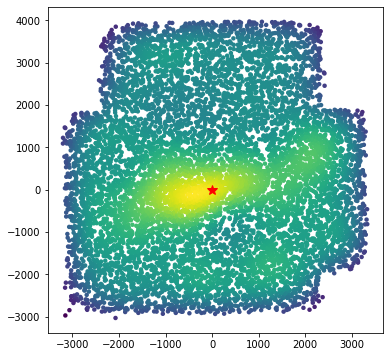

In [9]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(xgood, ygood, c=z, s=20, edgecolor='')
ax.plot(0,0,color='red',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
plt.show()


In [10]:
dist = np.sqrt(xgood**2 + ygood**2)

In [16]:
xuse = xgood[dist <= 1570]
yuse = ygood[dist <= 1570]
mBuse = mBgood[dist <= 1570]
mVuse = mVgood[dist <= 1570]
raUse = ragood[dist <= 1570]
decUse = decgood[dist <= 1570]

In [17]:
outArr = np.array([xuse,yuse,mBuse,mVuse,raUse,decUse])

In [18]:
outArr.shape

(6, 2331)

In [19]:
np.savetxt('hercXYmag.dat',outArr.T,header='X Y Bmag Vmag RA DEC')

In [14]:
print(min(xuse))
print(min(yuse))

print(max(xuse))
print(max(yuse))

-1557.7762115020423
-1565.6397541257147
1566.8437678578941
1551.9107734926197


In [15]:
# Calculate the point density
xy2 = np.vstack([xuse,yuse])
z2 = gaussian_kde(xy2)(xy2)

# fig, ax = plt.subplots()
# ax.scatter(x, y, c=z, s=100, edgecolor='')
# plt.show()

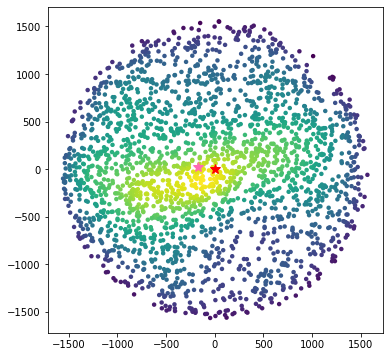

In [16]:
fig,ax=plt.subplots(figsize=(6,6))

ax.scatter(xuse, yuse, c=z2, s=20, edgecolor='')
ax.plot(0,0,color='red',ms=10,marker='*')
ax.plot(-171,26,color='hotpink',ms=10,marker='*')

# hor_x0 = 2149
# hor_y0 = 2372
plt.show()


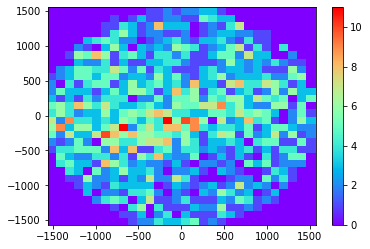

In [17]:
counts,xbins,ybins,image = plt.hist2d(xuse,yuse,bins=30, cmap = plt.cm.rainbow)
plt.colorbar()

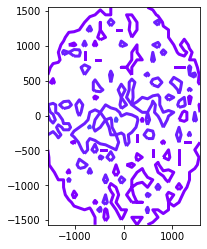

In [18]:
plt.subplot(122)
plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=3, cmap = plt.cm.rainbow, levels = [1,5,10,25,50,70,80,100])

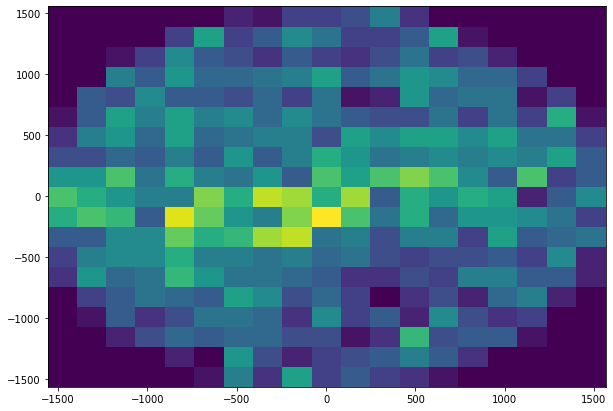

In [19]:
# fig = plt.subplots(figsize =(10, 7)) 
# Creating plot 
# plt.hist2d(xuse, yuse)

x_min = np.min(xuse) 
x_max = np.max(xuse) 
  
y_min = np.min(yuse) 
y_max = np.max(yuse) 
  
x_bins = np.linspace(x_min, x_max, 20) 
y_bins = np.linspace(y_min, y_max, 20) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
# Creating plot 
plt.hist2d(xuse, yuse, bins =[x_bins, y_bins]) 
plt.show()

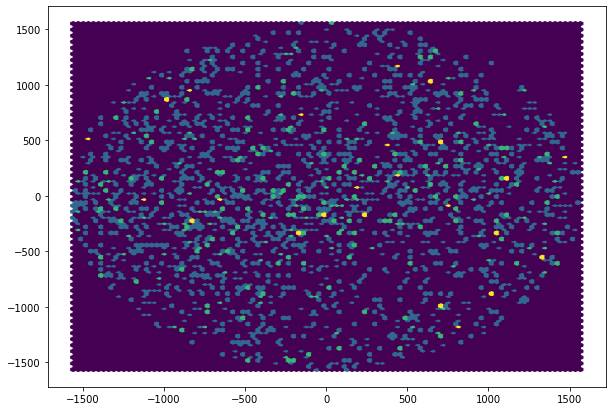

In [20]:
fig, ax = plt.subplots(figsize =(10, 7)) 
plt.hexbin(xuse, yuse, bins = 100) 

plt.show()

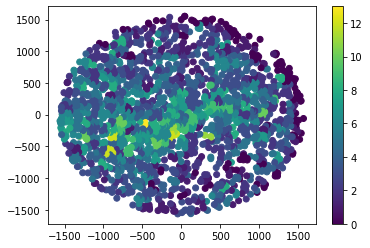

In [21]:
xedges, yedges = np.linspace(-1650, 1650, 30), np.linspace(-1650, 1650, 30)
hist, xedges, yedges = np.histogram2d(xuse, yuse, (xedges, yedges))
xidx = np.clip(np.digitize(xuse, xedges), 0, hist.shape[0]-1)
yidx = np.clip(np.digitize(yuse, yedges), 0, hist.shape[1]-1)
c = hist[xidx, yidx]
plt.scatter(xuse, yuse, c=c)
plt.colorbar()

plt.show()

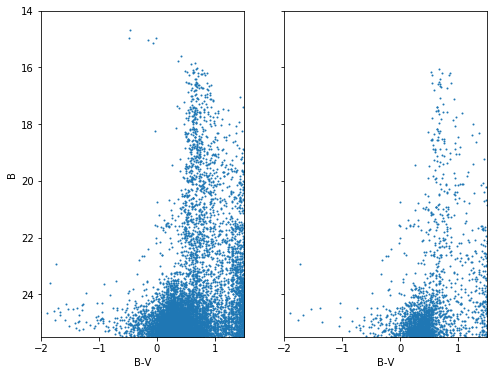

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6),sharex=True,sharey=True)

ax1.scatter(mBgood-mVgood,mBgood,s=1)
ax2.scatter(mBuse-mVuse,mBuse,s=1)

ax1.set_ylim(25.5,14)
ax2.set_ylim(25.5,14)

ax1.set_xlim(-2,1.5)
ax1.set_xlabel('B-V')
ax2.set_xlabel('B-V')
ax1.set_ylabel('B')

plt.show()

In [23]:
def median_interval(data, alpha=0.32):
    """
    Median including Bayesian credible interval.

    Parameters
    ----------
    data  : posterior samples
    alpha : 1 - confidence interval

    Returns
    -------
    [med,[lo, hi]] : median, lower, and upper percentiles
    
    """
    q = [100*alpha/2., 50, 100*(1-alpha/2.)]
    lo,med,hi = np.percentile(data,q)
    return [med,[lo,hi]]

In [24]:
def returnPDF(rich,x0,y0,gal_ext_pix,gal_ell,gal_pa):
    
    costh = np.cos(-1 * np.deg2rad(gal_pa))
    sinth = np.sin(-1 * np.deg2rad(gal_pa))

    dx = xbin - x0
    dy = ybin - y0

    r1 = (dx * costh - dy * sinth) / (1 - gal_ell)
    r2 = (dx * sinth + dy * costh)

    radius = np.sqrt(r1**2 + r2**2)
    
    r_h = gal_ext_pix
    norm = r_h**2 / (np.pi * (1-gal_ell))
    # half light radius squared / (pi * 1-ell)
    pdf = norm/((radius**2 + r_h**2)**2)
    
    arr = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
    r_annuli = (arr + 0.05) * r_h

    # .05r_h, .15r_h
    area_annuli = np.pi * ( (r_annuli + (0.05*r_h))**2 - (r_annuli - (0.05*r_h))**2) * (1-gal_ell)
    
#     pix_per_arcsec=20
#     area_arcmin = area_annuli/(pix_per_arcsec*60)**2
    
    aa = area_annuli # trying. to do everything in pixel space right now

    return pdf, radius, aa


In [25]:
samples_h = cPickle.load( open( "hercMcmcPL2502-4.p", "rb" ) )
#MEDIAN VALUES AND +/-1 SIGMA FOR EACH FIT PARAMETER
rich_h,[rich_min,rich_max] = median_interval(samples_h[:,0])
x_h,[xmin,xmax] = median_interval(samples_h[:,1])
y_h,[ymin,ymax] = median_interval(samples_h[:,2])
herc_ext_fit_h,[herc_ext_min,herc_ext_max] = median_interval(samples_h[:,3])
herc_ell_fit_h,[herc_ell_min,herc_ell_max] = median_interval(samples_h[:,4])
herc_pa_fit_h,[herc_pa_min,herc_pa_max] = median_interval(samples_h[:,5])

res = [rich_h,rich_max-rich_h,rich_h-rich_min,x_h,xmax-x_h,x_h-xmin,y_h,ymax-y_h,y_h-ymin,
           herc_ext_fit_h,herc_ext_max-herc_ext_fit_h,herc_ext_fit_h-herc_ext_min,
           herc_ell_fit_h,herc_ell_max-herc_ell_fit_h,herc_ell_fit_h-herc_ell_min,
           herc_pa_fit_h,herc_pa_max-herc_pa_fit_h,herc_pa_fit_h-herc_pa_min]

print(res)

[3917.137541281157, 131.90304276353072, 124.03120039044734, -140.80801049420154, 33.756593168227056, 34.4939870659332, 10.52507957385738, 19.587829047904247, 19.577336465842283, 1793.5315887902316, 83.34063323403211, 76.0536398697127, 0.3347434651657925, 0.03245662848156988, 0.03325373386064662, -84.85682749043671, 2.6207936047709666, 2.559435948302749]


In [26]:
herc_ext_d = 6.27/60 # degrees
herc_ext_pix_d = herc_ext_d*(3600/0.2255)

In [27]:
rich_d = 4000
x_d = 1.2793787463139303 
y_d = -2.6330748750413733
herc_ext_fit_d = herc_ext_pix_d
herc_ell_fit_d = 0.67
herc_pa_fit_d = -72.59

In [28]:
xbin0 = np.ones((109,1))  # (fltarr(267)+1)
xbin1 = np.ones((1,109))  
xbin1[0] = np.arange(0,109,1)
xbin2 = xbin1 * 30 + 15  # (findgen(267)*30. + 15)
xbin = np.matmul(xbin0,xbin2)
ybin = xbin.T

xdel = 30.
ydel = 30.
pixarea = xdel*ydel  # pixel area in each bin

In [29]:
pdf_h, rad_h, aa_h = returnPDF(rich_h,x_h,y_h,herc_ext_fit_h,
                                        herc_ell_fit_h,herc_pa_fit_h)

In [30]:
pdf_d, rad_d, aa_d = returnPDF(rich_d,x_d,y_d,herc_ext_fit_d,
                                        herc_ell_fit_d,herc_pa_fit_d)

In [31]:
model_counts_h = rich_h*pdf_h*pixarea  # a 179x179 array
model_counts_d = rich_d*pdf_d*pixarea  # a 179x179 array

In [32]:
# Observed surface density map
binned_surface_density_30 = np.zeros((109,109))
for ii in range(109):
    for jj in range(109):
        idx = np.logical_and(np.logical_and(xuse >= (30 * ii),xuse <= (30 * (ii + 1))),
                     np.logical_and(yuse >= (30 * jj),yuse <= (30 * (jj + 1))))

        tmp = np.where(idx)[0]
#         # flipping ii and jj because in IDL, it's col, row.
        binned_surface_density_30[jj,ii] = len(tmp)

In [33]:
# Define annuli
radiusH=rad_h.flatten()
r_h_h = herc_ext_fit_h
r1_h = np.where(radiusH < (0.1 * r_h_h))[0]
r2_h = np.where((radiusH < (0.2 * r_h_h)) & (radiusH >= (0.1 * r_h_h)))[0]
r3_h = np.where((radiusH < (0.3 * r_h_h)) & (radiusH >= (0.2 * r_h_h)))[0]
r4_h = np.where((radiusH < (0.4 * r_h_h)) & (radiusH >= (0.3 * r_h_h)))[0]
r5_h = np.where((radiusH < (0.5 * r_h_h)) & (radiusH >= (0.4 * r_h_h)))[0]
r6_h = np.where((radiusH < (0.6 * r_h_h)) & (radiusH >= (0.5 * r_h_h)))[0]
r7_h = np.where((radiusH < (0.7 * r_h_h)) & (radiusH >= (0.6 * r_h_h)))[0]
r8_h = np.where((radiusH < (0.8 * r_h_h)) & (radiusH >= (0.7 * r_h_h)))[0]
r9_h = np.where((radiusH < (0.9 * r_h_h)) & (radiusH >= (0.8 * r_h_h)))[0]
r10_h = np.where((radiusH < r_h_h) & (radiusH >= (0.9 * r_h_h)))[0]

In [34]:
# Define annuli
radiusD=rad_d.flatten()
r_h_d = herc_ext_fit_d
r1_d = np.where(radiusD < (0.1 * r_h_d))[0]
r2_d = np.where((radiusD < (0.2 * r_h_d)) & (radiusD >= (0.1 * r_h_d)))[0]
r3_d = np.where((radiusD < (0.3 * r_h_d)) & (radiusD >= (0.2 * r_h_d)))[0]
r4_d = np.where((radiusD < (0.4 * r_h_d)) & (radiusD >= (0.3 * r_h_d)))[0]
r5_d = np.where((radiusD < (0.5 * r_h_d)) & (radiusD >= (0.4 * r_h_d)))[0]
r6_d = np.where((radiusD < (0.6 * r_h_d)) & (radiusD >= (0.5 * r_h_d)))[0]
r7_d = np.where((radiusD < (0.7 * r_h_d)) & (radiusD >= (0.6 * r_h_d)))[0]
r8_d = np.where((radiusD < (0.8 * r_h_d)) & (radiusD >= (0.7 * r_h_d)))[0]
r9_d = np.where((radiusD < (0.9 * r_h_d)) & (radiusD >= (0.8 * r_h_d)))[0]
r10_d = np.where((radiusD < r_h_d) & (radiusD >= (0.9 * r_h_d)))[0]

In [35]:
print(r_h_h,r_h_d)

1793.5315887902316 1668.2926829268292


In [36]:
binned_surface_density_30f = binned_surface_density_30.flatten()
model_counts_herc_h_f = model_counts_h.flatten()
model_counts_herc_d_f = model_counts_d.flatten()

In [37]:
binned_surface_density_30f[r1_h].sum()

1.0

In [38]:
data_1d_h = [binned_surface_density_30f[r1_h].sum()/aa_h[0],
           binned_surface_density_30f[r2_h].sum()/aa_h[1],
           binned_surface_density_30f[r3_h].sum()/aa_h[2],
           binned_surface_density_30f[r4_h].sum()/aa_h[3],
           binned_surface_density_30f[r5_h].sum()/aa_h[4],
           binned_surface_density_30f[r6_h].sum()/aa_h[5],
           binned_surface_density_30f[r7_h].sum()/aa_h[6],
           binned_surface_density_30f[r8_h].sum()/aa_h[7],
           binned_surface_density_30f[r9_h].sum()/aa_h[8],
           binned_surface_density_30f[r10_h].sum()/aa_h[9]]

data_1d_d = [binned_surface_density_30f[r1_d].sum()/aa_d[0],
           binned_surface_density_30f[r2_d].sum()/aa_d[1],
           binned_surface_density_30f[r3_d].sum()/aa_d[2],
           binned_surface_density_30f[r4_d].sum()/aa_d[3],
           binned_surface_density_30f[r5_d].sum()/aa_d[4],
           binned_surface_density_30f[r6_d].sum()/aa_d[5],
           binned_surface_density_30f[r7_d].sum()/aa_d[6],
           binned_surface_density_30f[r8_d].sum()/aa_d[7],
           binned_surface_density_30f[r9_d].sum()/aa_d[8],
           binned_surface_density_30f[r10_d].sum()/aa_d[9]]

model_1d_h = [model_counts_herc_h_f[r1_h].sum()/aa_h[0],
            model_counts_herc_h_f[r2_h].sum()/aa_h[1],
            model_counts_herc_h_f[r3_h].sum()/aa_h[2],
            model_counts_herc_h_f[r4_h].sum()/aa_h[3],
            model_counts_herc_h_f[r5_h].sum()/aa_h[4],
            model_counts_herc_h_f[r6_h].sum()/aa_h[5],
            model_counts_herc_h_f[r7_h].sum()/aa_h[6],
            model_counts_herc_h_f[r8_h].sum()/aa_h[7],
            model_counts_herc_h_f[r9_h].sum()/aa_h[8],
            model_counts_herc_h_f[r10_h].sum()/aa_h[9]]

model_1d_d = [model_counts_herc_d_f[r1_d].sum()/aa_d[0],
            model_counts_herc_d_f[r2_d].sum()/aa_d[1],
            model_counts_herc_d_f[r3_d].sum()/aa_d[2],
            model_counts_herc_d_f[r4_d].sum()/aa_d[3],
            model_counts_herc_d_f[r5_d].sum()/aa_d[4],
            model_counts_herc_d_f[r6_d].sum()/aa_d[5],
            model_counts_herc_d_f[r7_d].sum()/aa_d[6],
            model_counts_herc_d_f[r8_d].sum()/aa_d[7],
            model_counts_herc_d_f[r9_d].sum()/aa_d[8],
            model_counts_herc_d_f[r10_d].sum()/aa_d[9]]

In [39]:
dist_h = np.array([r_h_h*0.1,r_h_h*0.2,r_h_h*0.3,r_h_h*0.4,r_h_h*0.5,r_h_h*0.6,r_h_h*0.7,r_h_h*0.8,r_h_h*0.9,r_h_h])
dist_d = np.array([r_h_d*0.1,r_h_d*0.2,r_h_d*0.3,r_h_d*0.4,r_h_d*0.5,r_h_d*0.6,r_h_d*0.7,r_h_d*0.8,r_h_d*0.9,r_h_d])

In [40]:
print(dist_h)
print(dist_d)

[ 179.35315888  358.70631776  538.05947664  717.41263552  896.7657944
 1076.11895327 1255.47211215 1434.82527103 1614.17842991 1793.53158879]
[ 166.82926829  333.65853659  500.48780488  667.31707317  834.14634146
 1000.97560976 1167.80487805 1334.63414634 1501.46341463 1668.29268293]


In [41]:
def plummer(radius,rich,r_h,ell):
    
    term1 = rich / (np.pi * r_h**2 * (1-ell))
    term2 = (1 + (radius**2/r_h**2))**(-2)
    
    return term1 * term2
    

In [42]:
plummer0 = plummer(dist_h,rich_h,r_h_h,herc_ell_fit_h)
plummer1 = plummer(dist_d,rich_d,r_h_d,herc_ell_fit_d)

In [44]:
arr = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

In [45]:
plummer2 = plummer(3498*arr,6103,3498,0.67)

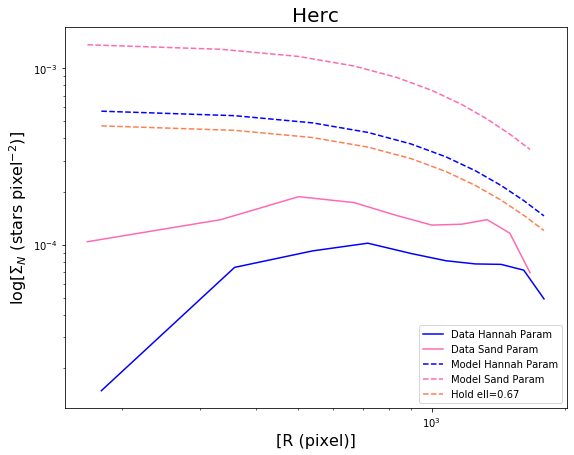

In [47]:
fig, ax = plt.subplots(figsize=(9,7))

ax.plot(dist_h[:],data_1d_h[:],label='Data Hannah Param',color='blue')
ax.plot(dist_d,data_1d_d,label='Data Sand Param',color='hotpink')

# ax.plot(dist_h[:],model_1d_h[:],label='Model Hannah Param',color='blue',linestyle='--')
# ax.plot(dist_d,model_1d_d,label='Model Sand Param',color='hotpink',linestyle='--')
ax.plot(dist_h[:],plummer0,label='Model Hannah Param',color='blue',linestyle='--')
ax.plot(dist_d,plummer1,label='Model Sand Param',color='hotpink',linestyle='--')
ax.plot(dist_h,plummer2,label='Hold ell=0.67',color='coral',linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel(r'log[$\Sigma_N$ (stars pixel$^{-2}$)]',fontsize=16)
ax.set_xlabel(r'[R (pixel)]',fontsize=16)
ax.set_title('Herc',fontsize=20)

# ax.set_xticks([1, 2])
# ax.get_xaxis().set_major_formatter(mpl.ticker.ScalarFormatter())

# ax.set_yticks([1e+2, 1e+3])
# ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


ax.legend()
# plt.savefig('figures/sgr2_1902pa.png')
plt.show()